<a href="https://colab.research.google.com/github/patibandlavenkatamanideep/EDA-Analysis/blob/main/EDA_for_Used_Cars_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [180]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
sukhmanibedi_cars4u_path = kagglehub.dataset_download('sukhmanibedi/cars4u')

print('Data source import complete.')


Data source import complete.


In [181]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cars4u/used_cars_data.csv


In [182]:
data = pd.read_csv('/kaggle/input/cars4u/used_cars_data.csv')
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [184]:
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [185]:
data.shape

(7253, 14)

In [186]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [187]:
data.isnull().sum()

,0
S.No.,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,46


In [188]:
data.nunique()

,0
S.No.,7253
Name,2041
Location,11
Year,23
Kilometers_Driven,3660
Fuel_Type,5
Transmission,2
Owner_Type,4
Mileage,450
Engine,150


In [189]:
data.describe()

,S.No.,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,5.279722,9.479468
std,2093.905084,3.254421,8.442772e+04,0.811660,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,5.000000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,5.000000,9.950000
max,7252.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [190]:
data = data[data['Seats'] !=0]
data.describe()

,S.No.,Year,Kilometers_Driven,Seats,Price
count,7252.000000,7252.000000,7.252000e+03,7199.000000,6018.000000
mean,3625.948566,2013.365554,5.868992e+04,5.280456,9.478053
std,2094.044884,3.254606,8.442995e+04,0.809327,11.188307
min,0.000000,1996.000000,1.710000e+02,2.000000,0.440000
25%,1812.750000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3625.500000,2014.000000,5.340400e+04,5.000000,5.640000
75%,5439.250000,2016.000000,7.300000e+04,5.000000,9.950000
max,7252.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [191]:
data = data.drop(['S.No.'], axis=1)
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [192]:
from datetime import datetime
current_year = datetime.now().year
data['Car_age'] = current_year - data['Year']
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,15
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,10
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,14
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,13
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,12


In [193]:
data['Brand'] = data.Name.str.split().str.get(0)
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_age,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,15,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,10,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,14,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,13,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,12,Audi


In [194]:
data['Model'] = data.Name.str.split().str.get(1) + ' ' + data.Name.str.split().str.get(2)
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_age,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,15,Maruti,Wagon R
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,10,Hyundai,Creta 1.6
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,14,Honda,Jazz V
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,13,Maruti,Ertiga VDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,12,Audi,A4 New


In [195]:
data[['Name','Brand','Model']]

,Name,Brand,Model
0,Maruti Wagon R LXI CNG,Maruti,Wagon R
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Creta 1.6
2,Honda Jazz V,Honda,Jazz V
3,Maruti Ertiga VDI,Maruti,Ertiga VDI
4,Audi A4 New 2.0 TDI Multitronic,Audi,A4 New
...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Volkswagen,Vento Diesel
7249,Volkswagen Polo GT TSI,Volkswagen,Polo GT
7250,Nissan Micra Diesel XV,Nissan,Micra Diesel
7251,Volkswagen Polo GT TSI,Volkswagen,Polo GT


In [196]:
data.Brand.unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

In [197]:
data['Brand'] = data['Brand'].str.replace('ISUZU','Isuzu')
data['Brand'] = data['Brand'].str.replace('Land','Land Rover')
data['Brand'] = data['Brand'].str.replace('Mercedes-Benz','Mercedes Benz')
data['Brand'] = data['Brand'].str.replace('Maruti','Maruti Suzuki')
data['Brand'] = data['Brand'].str.replace('Tata','Tata Motors')
data['Brand'] = data['Brand'].str.replace('Mini','Mini Cooper')

In [198]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_age,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,15,Maruti Suzuki,Wagon R
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,10,Hyundai,Creta 1.6
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,14,Honda,Jazz V
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,13,Maruti Suzuki,Ertiga VDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,12,Audi,A4 New


In [199]:
data['Engine'] = data['Engine'].str.replace('CC','')
data['Engine'] = pd.to_numeric(data['Engine'], errors='coerce')

In [200]:
data['Engine'].info()

<class 'pandas.core.series.Series'>
Index: 7252 entries, 0 to 7252
Series name: Engine
Non-Null Count  Dtype  
--------------  -----  
7206 non-null   float64
dtypes: float64(1)
memory usage: 113.3 KB


In [201]:
data['Engine'].isnull().sum()

np.int64(46)

In [202]:
data['Engine'].fillna(data['Engine'].median(), inplace=True)

In [203]:
data.sample(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_age,Brand,Model
4047,Honda City i VTEC CVT VX,Pune,2014,82329,Petrol,Automatic,First,18.0 kmpl,1497.0,117.3 bhp,5.0,NaN,7.50,11,Honda,City i
4731,Nissan Micra Active XV,Pune,2018,24000,Petrol,Manual,First,19.69 kmpl,1198.0,67.04 bhp,5.0,6.99 Lakh,4.00,7,Nissan,Micra Active
1945,Honda City i VTEC CVT SV,Kochi,2017,39430,Petrol,Automatic,First,18.0 kmpl,1497.0,117.3 bhp,5.0,NaN,8.29,8,Honda,City i
5395,Hyundai Verna 1.6 CRDi AT SX,Kochi,2016,42024,Diesel,Automatic,First,19.08 kmpl,1582.0,126.2 bhp,5.0,NaN,9.73,9,Hyundai,Verna 1.6
995,Mercedes-Benz A Class A180 Sport,Pune,2015,11000,Petrol,Automatic,First,15.5 kmpl,1595.0,120.7 bhp,5.0,NaN,16.00,10,Mercedes Benz,A Class
6922,Honda Mobilio V i DTEC,Kolkata,2014,39000,Diesel,Manual,First,24.2 kmpl,1498.0,98.6 bhp,7.0,NaN,NaN,11,Honda,Mobilio V
4680,Maruti Ertiga VDI,Pune,2016,54161,Diesel,Manual,First,25.47 kmpl,1248.0,88.50 bhp,7.0,11.27 Lakh,7.64,9,Maruti Suzuki,Ertiga VDI
4214,Ford Figo Diesel Titanium,Chennai,2011,169000,Diesel,Manual,First,20.0 kmpl,1399.0,68 bhp,5.0,NaN,2.50,14,Ford,Figo Diesel
92,Audi A6 2011-2015 35 TDI Premium,Coimbatore,2018,48367,Diesel,Automatic,First,17.68 kmpl,1968.0,174.33 bhp,5.0,NaN,39.58,7,Audi,A6 2011-2015
3170,Chevrolet Cruze LTZ,Coimbatore,2014,80073,Diesel,Manual,First,17.3 kmpl,1998.0,163.7 bhp,5.0,NaN,7.11,11,Chevrolet,Cruze LTZ


In [204]:
data['Mileage'].unique()

array(['26.6 km/kg', '19.67 kmpl', '18.2 kmpl', '20.77 kmpl', '15.2 kmpl',
       '21.1 km/kg', '23.08 kmpl', '11.36 kmpl', '20.54 kmpl',
       '22.3 kmpl', '21.56 kmpl', '16.8 kmpl', '25.2 kmpl', '12.7 kmpl',
       '0.0 kmpl', '13.5 kmpl', '25.8 kmpl', '28.4 kmpl', '20.45 kmpl',
       '14.84 kmpl', '22.69 kmpl', '23.65 kmpl', '13.53 kmpl',
       '18.5 kmpl', '14.4 kmpl', '20.92 kmpl', '17.5 kmpl', '12.8 kmpl',
       '19.01 kmpl', '14.53 kmpl', '11.18 kmpl', '12.4 kmpl',
       '16.09 kmpl', '14.0 kmpl', '24.3 kmpl', '18.15 kmpl', '11.74 kmpl',
       '22.07 kmpl', '19.7 kmpl', '25.4 kmpl', '25.32 kmpl', '14.62 kmpl',
       '14.28 kmpl', '14.9 kmpl', '11.25 kmpl', '24.4 kmpl', '16.55 kmpl',
       '17.11 kmpl', '22.9 kmpl', '17.8 kmpl', '18.9 kmpl', '15.04 kmpl',
       '25.17 kmpl', '20.36 kmpl', '13.29 kmpl', '13.68 kmpl',
       '20.0 kmpl', '15.8 kmpl', '25.0 kmpl', '16.4 kmpl', '24.52 kmpl',
       '22.1 kmpl', '8.5 kmpl', '15.1 kmpl', '16.95 kmpl', '19.64 kmpl',
       '16.

In [205]:
data['Mileage'] = data['Mileage'].astype(str)
data['Mileage'] = data['Mileage'].str.replace(' kmpl','').str.replace(' km/kg','')
data['Mileage'] = pd.to_numeric(data['Mileage'], errors='coerce')
data['Mileage'].fillna(data['Mileage'].median(), inplace=True)


In [206]:
data['Mileage'].info()

<class 'pandas.core.series.Series'>
Index: 7252 entries, 0 to 7252
Series name: Mileage
Non-Null Count  Dtype  
--------------  -----  
7252 non-null   float64
dtypes: float64(1)
memory usage: 113.3 KB


In [207]:
data['Power'] = data['Power'].astype(str)
data['Power'] = data['Power'].str.replace(' bhp','')
data['Power'] = data['Power'].replace(['null', 'null '], np.nan)
data['Power'] = pd.to_numeric(data['Power'], errors='coerce')
data['Power'].fillna(data['Power'].median(), inplace=True)

In [208]:
data['Power'].info()

<class 'pandas.core.series.Series'>
Index: 7252 entries, 0 to 7252
Series name: Power
Non-Null Count  Dtype  
--------------  -----  
7252 non-null   float64
dtypes: float64(1)
memory usage: 113.3 KB


In [209]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_age,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,15,Maruti Suzuki,Wagon R
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,10,Hyundai,Creta 1.6
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50,14,Honda,Jazz V
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,13,Maruti Suzuki,Ertiga VDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,12,Audi,A4 New


In [210]:
data['Seats'].fillna(data['Seats'].median(), inplace=True)

In [211]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7252 entries, 0 to 7252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7252 non-null   object 
 1   Location           7252 non-null   object 
 2   Year               7252 non-null   int64  
 3   Kilometers_Driven  7252 non-null   int64  
 4   Fuel_Type          7252 non-null   object 
 5   Transmission       7252 non-null   object 
 6   Owner_Type         7252 non-null   object 
 7   Mileage            7252 non-null   float64
 8   Engine             7252 non-null   float64
 9   Power              7252 non-null   float64
 10  Seats              7252 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6018 non-null   float64
 13  Car_age            7252 non-null   int64  
 14  Brand              7252 non-null   object 
 15  Model              7251 non-null   object 
dtypes: float64(5), int64(3), obje

In [212]:
data['Owner_Type'].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [213]:
mapping = {
    'First': 1,
    'Second': 2,
    'Third': 3,
    'Fourth & Above': 4
}
data['Owner_Type'] = data['Owner_Type'].map(mapping)

data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_age,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,1,26.60,998.0,58.16,5.0,NaN,1.75,15,Maruti Suzuki,Wagon R
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,1,19.67,1582.0,126.20,5.0,NaN,12.50,10,Hyundai,Creta 1.6
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,1,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50,14,Honda,Jazz V
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,1,20.77,1248.0,88.76,7.0,NaN,6.00,13,Maruti Suzuki,Ertiga VDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,2,15.20,1968.0,140.80,5.0,NaN,17.74,12,Audi,A4 New


In [214]:
data.describe()

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_age
count,7252.000000,7.252000e+03,7252.000000,7252.000000,7252.000000,7252.000000,7252.000000,6018.000000,7252.000000
mean,2013.365554,5.868992e+04,1.201600,18.142639,1615.571704,112.314973,5.278406,9.478053,11.634446
std,3.254606,8.442995e+04,0.456834,4.560999,593.225586,52.925793,0.806717,11.188307,3.254606
min,1996.000000,1.710000e+02,1.000000,0.000000,72.000000,34.200000,2.000000,0.440000,6.000000
25%,2011.000000,3.400000e+04,1.000000,15.192500,1198.000000,77.000000,5.000000,3.500000,9.000000
50%,2014.000000,5.340400e+04,1.000000,18.160000,1493.000000,94.000000,5.000000,5.640000,11.000000
75%,2016.000000,7.300000e+04,1.000000,21.100000,1968.000000,138.030000,5.000000,9.950000,14.000000
max,2019.000000,6.500000e+06,4.000000,33.540000,5998.000000,616.000000,10.000000,160.000000,29.000000


In [215]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7252 entries, 0 to 7252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7252 non-null   object 
 1   Location           7252 non-null   object 
 2   Year               7252 non-null   int64  
 3   Kilometers_Driven  7252 non-null   int64  
 4   Fuel_Type          7252 non-null   object 
 5   Transmission       7252 non-null   object 
 6   Owner_Type         7252 non-null   int64  
 7   Mileage            7252 non-null   float64
 8   Engine             7252 non-null   float64
 9   Power              7252 non-null   float64
 10  Seats              7252 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6018 non-null   float64
 13  Car_age            7252 non-null   int64  
 14  Brand              7252 non-null   object 
 15  Model              7251 non-null   object 
dtypes: float64(5), int64(4), obje

In [216]:
data.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price', 'Car_age', 'Brand', 'Model'],
      dtype='object')

In [217]:
num_var = data.select_dtypes(include= 'number').columns.to_list()
num_var

['Year',
 'Kilometers_Driven',
 'Owner_Type',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'Price',
 'Car_age']

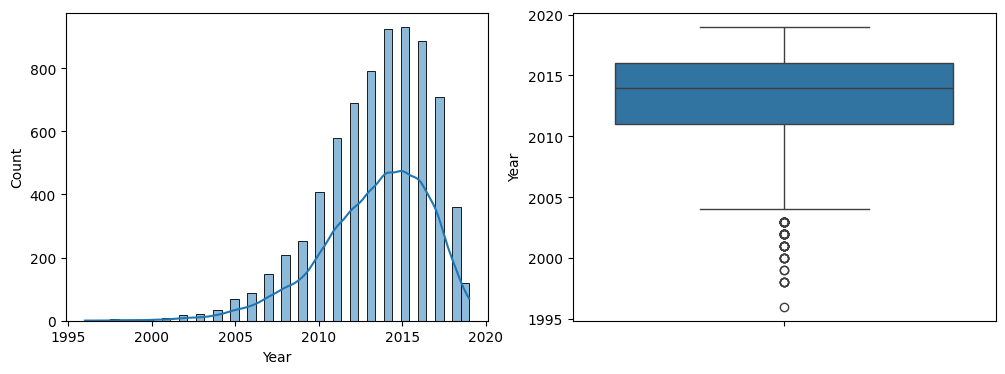

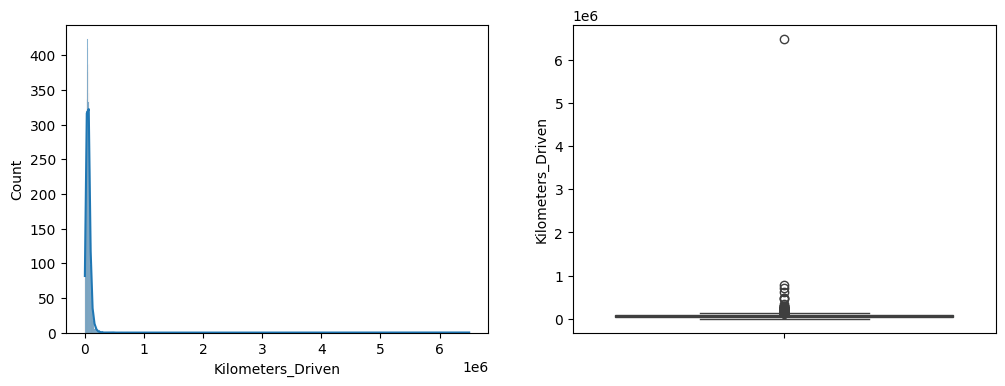

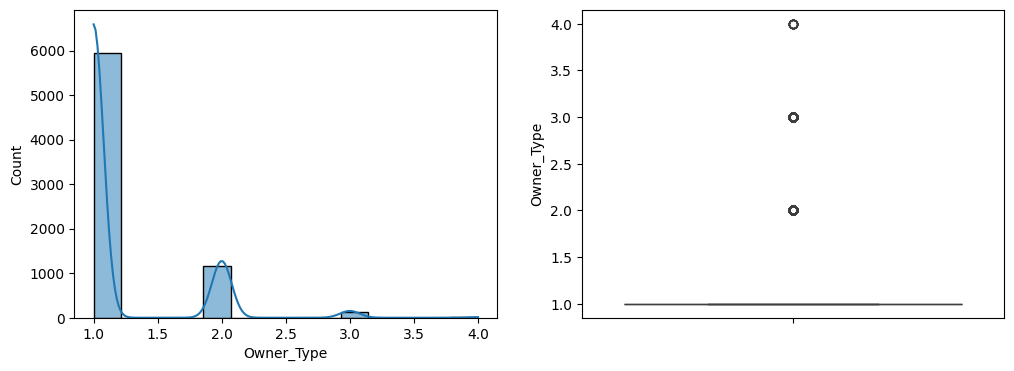

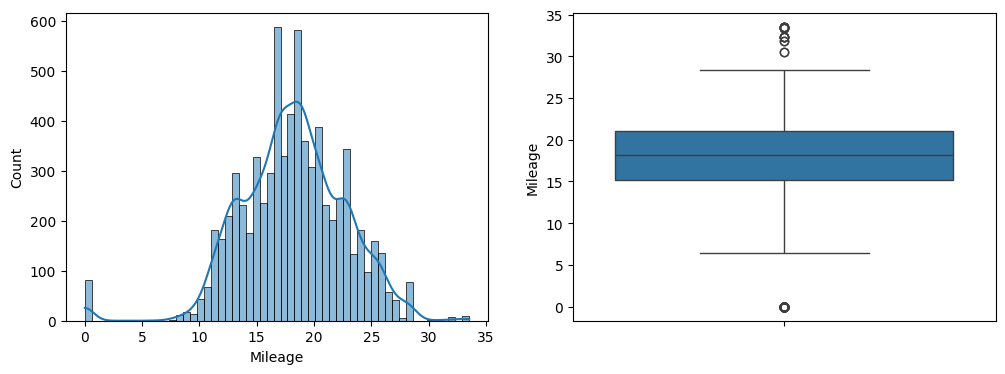

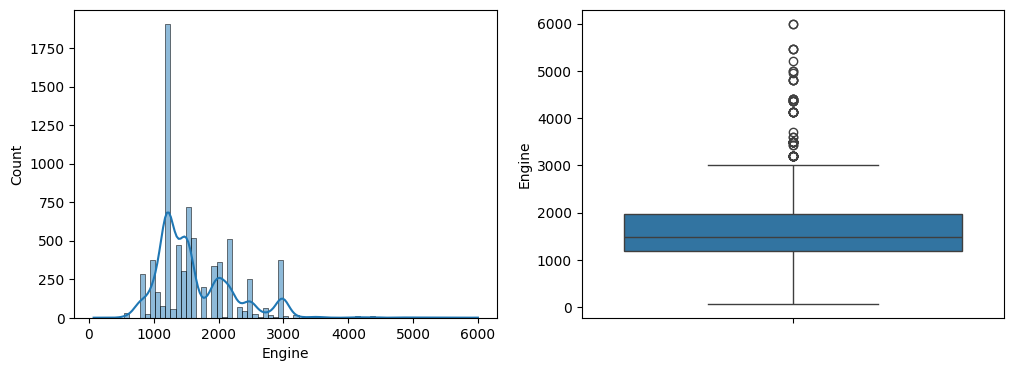

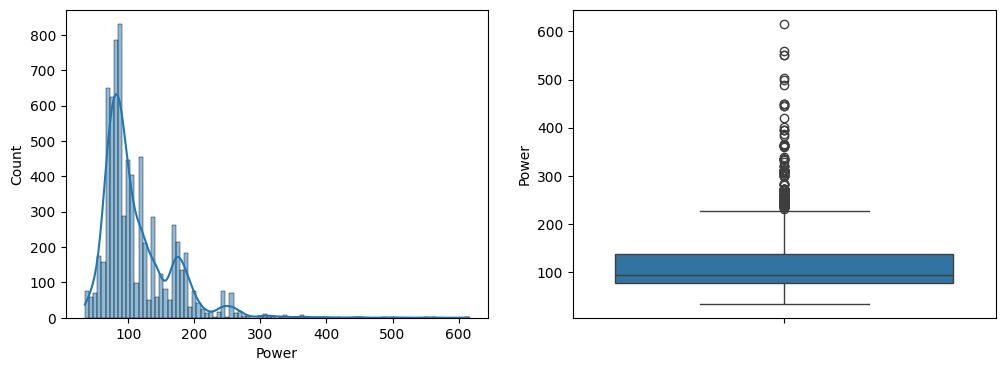

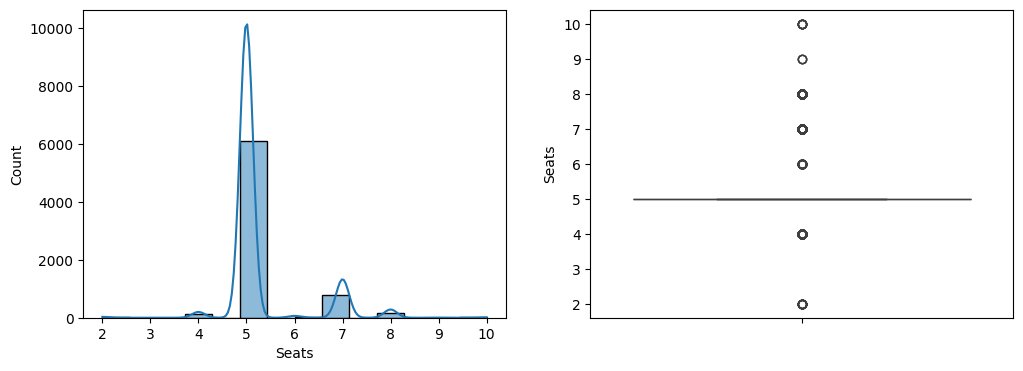

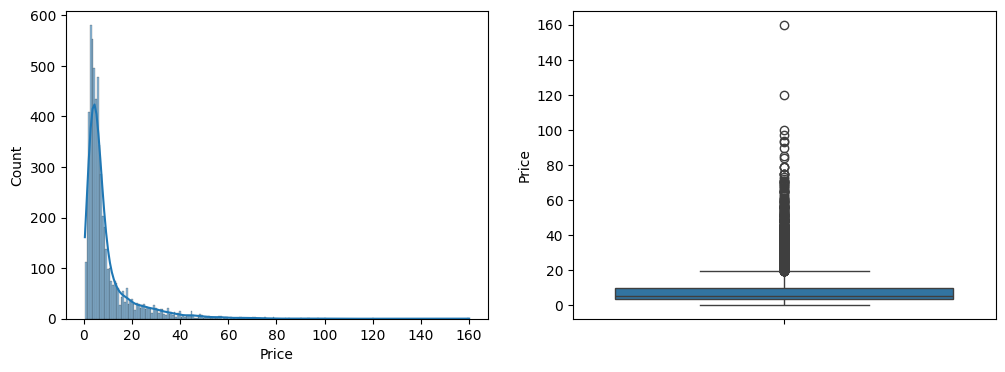

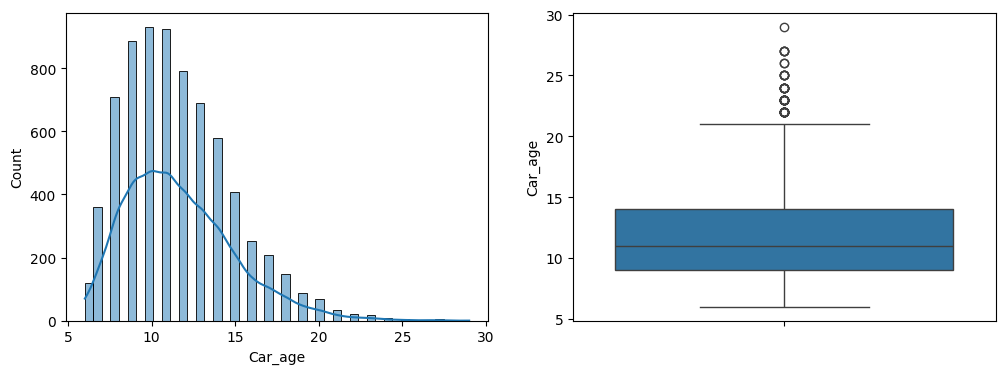

In [218]:
for col in num_var:
  fig, axes = plt.subplots(1, 2, figsize=(12, 4))
  sns.histplot(data[col], ax=axes[0], kde= True)
  sns.boxplot(data[col], ax=axes[1])
  plt.show()

In [222]:
data.select_dtypes(include='object').columns

Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'New_Price', 'Brand',
       'Model'],
      dtype='object')

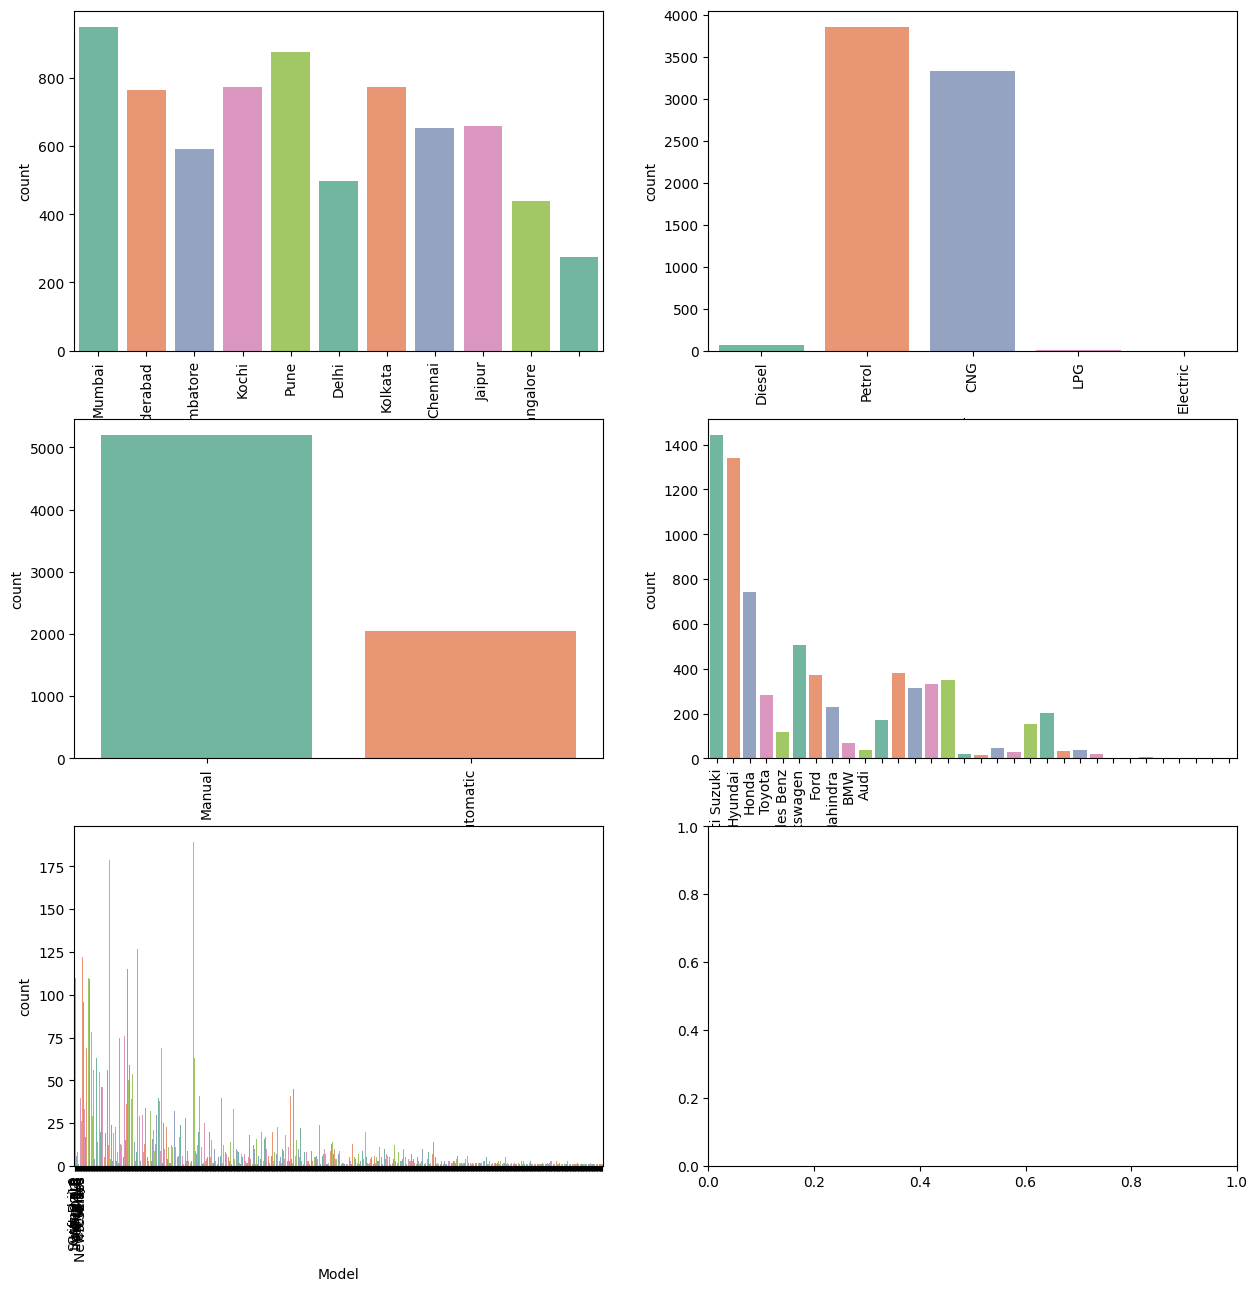

In [223]:
cat_col = ['Location', 'Fuel_Type', 'Transmission', 'Brand', 'Model']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
palette = sns.color_palette('Set2', n_colors=len(cat_col))

for axes, col in zip(axes.flatten(), cat_col):
    order = data[col].value_counts().head(10).index
    sns.countplot(data=data, x=col, ax=axes, palette=palette)
    axes.tick_params(axis='x', rotation=90)
    axes.set_xticklabels(labels = order)

plt.show()

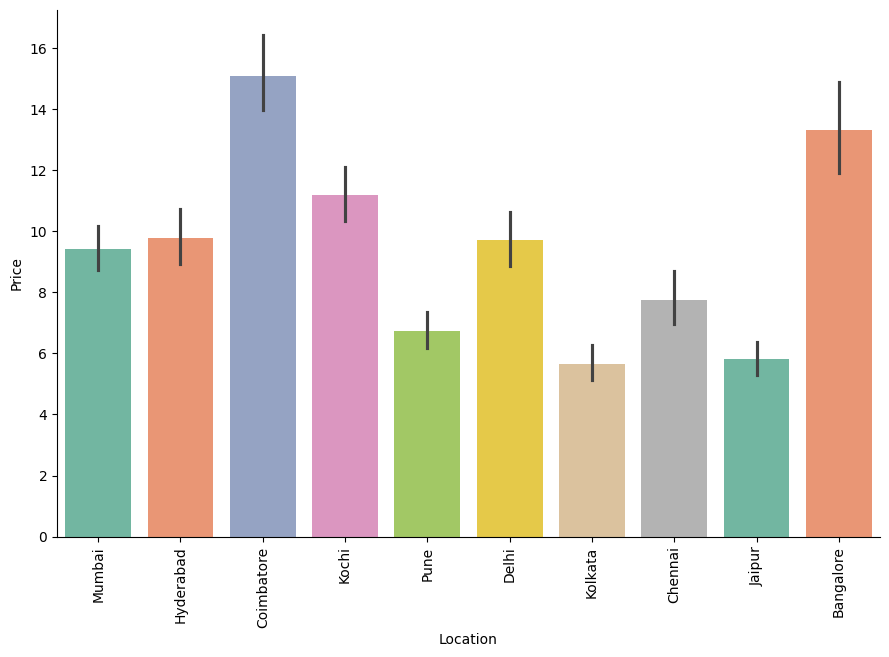

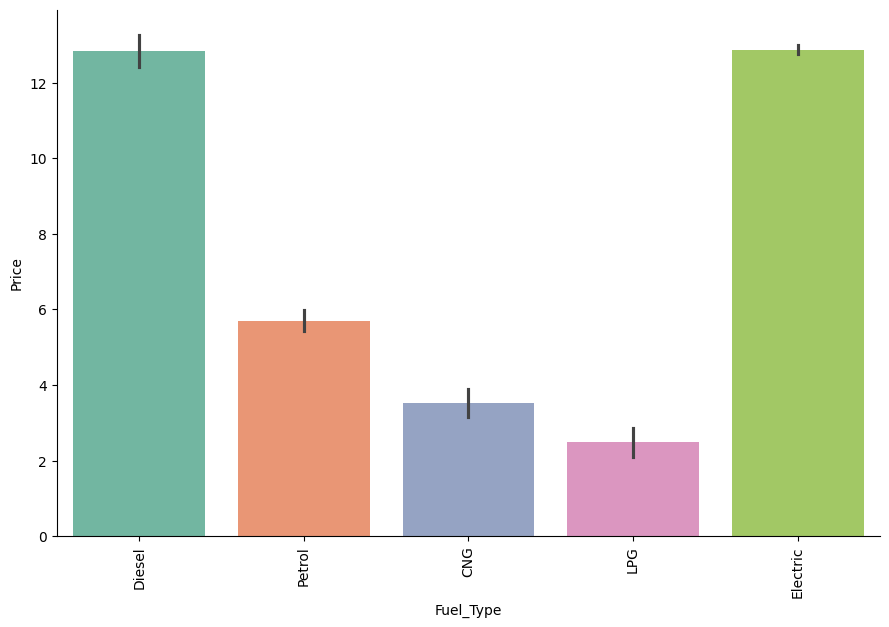

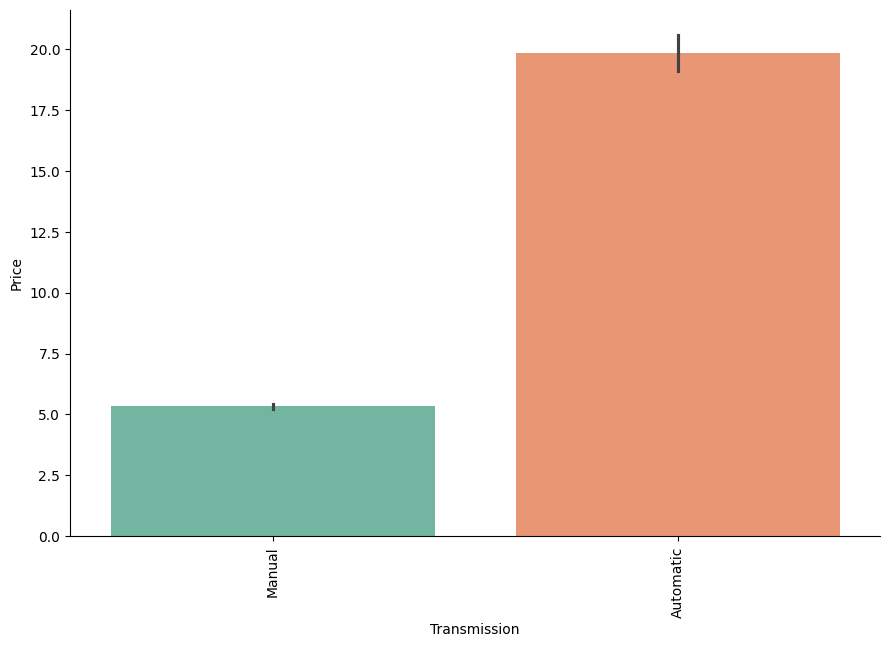

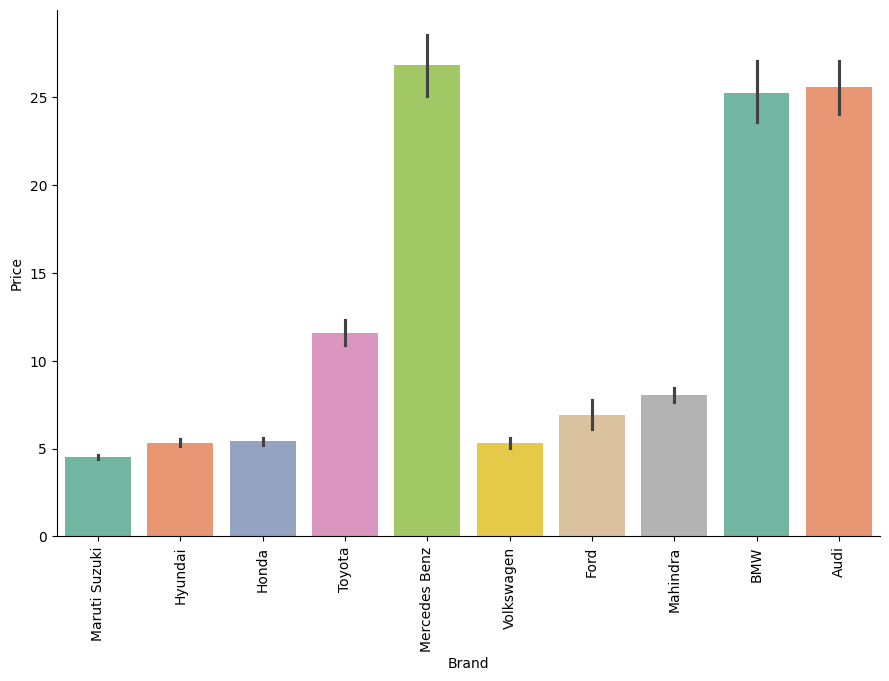

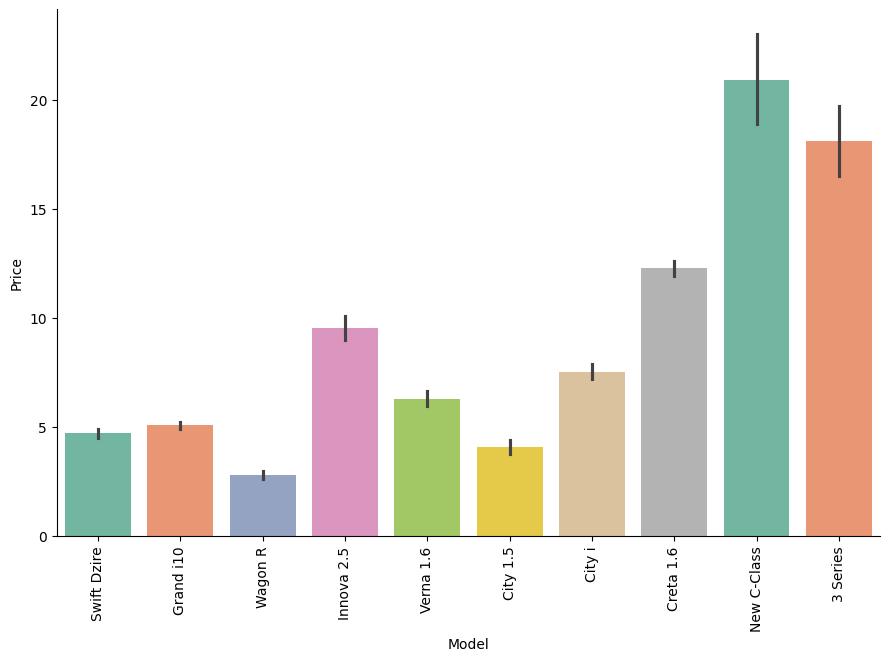

In [221]:
for col in cat_col:
  top10 = data[col].value_counts().nlargest(10).index
  sns.catplot(
      data=data[data[col].isin(top10)],
      x=col,
      y='Price',
      kind='bar',
      order=top10,
      palette='Set2',
      height = 6,
      aspect = 1.5
  )

  plt.xticks(rotation=90)
  plt.show()
